# Random walk and CLT

$^*CLT:$  **Central Limit Theorem**

In [223]:
import numpy as np
from numpy.random import normal, choice, uniform

import scipy 
from scipy import stats
import ipywidgets as widgets
import matplotlib.pyplot as plt

### Objectives

- Learn what Central Limit Theorem and law of large numbers.
- Be able to invoke CLT to make predicitons.
- Learn to use random numbers from numpy.random library
- Learn to build simple simulations on the example of random walk
- Learn to use statistical distributions to fit probability distirbutions computed from simulations. 


### Sum of random variables

- Consider a sequence $X_1, X_2, \ldots$ of **i.i.d. (independent identically distributed)** ranom variables. What would be the distirbution of a **sample sum** of n number of such random variables?

$$S_n = \sum_{i=1}^n X_i$$

- Since we have identical random variables each member of sum will have the same mean $\mu = E(X_1)$ and variance $\sigma^2 = V(X_1)$.  


- Becasue we are dealing with **independent random variables** both the variance and the expectation of sample sum are a liiner function of $n$ number of steps. In other words no cross terms survive averaging. 

$$E\left(S_n\right) = \sum_{i=1}^n E\left(X_i\right) = n \mu$$

$$V\left(S_n\right) = E[ S^2_n] - E[S_n]^2 =  \sum_{i=1}^n V\left(X_i\right) = n \sigma^2$$

- Similarly mean value of sample sum $M_n = S_n/n$ we get

$$E\left[M_n\right] = \mu$$  

$$V\left(M_n\right) = \frac{\sigma^2}{n}$$

- Notice that the variance of the sample mean decreases to zero as *n* increases, implying that most of the probability distribution for $M$ is close to the mean value. this is known **Law of Large Numbers (LLN)** 

- Notice also that the sample mean converges to exact mean with variance gowing down as $n^{-1/2}$

$$\boxed{\frac{V(M_n)^{1/2}}{E(M_n)} = \frac{1}{n^{1/2}}\frac{\sigma}{\mu }}$$

### The Central Limit Theorem  (CLT)

Let us introduce  make our random variables **de-meaned** and **scaled** to not worry about mean and variance. 

$$Z_n = \frac{M_n - \mu}{V^{1/2}(M_n)} =  \frac{S_n - n\mu}{\sigma \sqrt{n}}$$


$$E\left[Z_n\right] = 0$$

$$V\left(Z_n\right) = 1$$

Let $X_1, X_2, \ldots $ be a sequence of i.i.d. random variables with common mean $\mu$ and variance $\sigma^2$. Define zero mean and unit variance sum:

$$Z_n = \frac{\sum_{i=1}^n (X_i - n\mu)}{\sigma \sqrt{n}}$$

Then, Central Limit Theorem asserts that the Probability distribution function or **PDF** of $Z_n$ converges to the standard normal distribution:

$$P\left(z\right) \sim  e^{-z^2/2}$$

> Note that there is an implicit assumption that the **mean and variance**, $\mu$ and $\sigma^2$, **are finite**. Thus CLT does not hold for certain power law distributed RVs.

### Random numbers, probability distribution and stat analysis

- The [**numpy.random**](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) has the fastest random number generators that are based on low level code written in C. 
- The [**Scipy.stats**](https://docs.scipy.org/doc/scipy/reference/stats.html ) has an extensive library of statistical distributions and tools for statistical analysis. 

- The [**Statsmodels**](https://www.statsmodels.org/stable/ ) Enhancing Scipy functionality with more tools
- The [**Seaborn**](https://docs.pymc.io/) library that enhances matplotlib functionality for stat visualization.  

### General overview of random numbers in python 

First we take a look at most widely used random numbers of numpy also called standard random numbers. These are rand (uniform random number on interval 0,1) and randn (stnadard normal random number with 0 mean and 1 variance). 

- When running code that uses random numbers results will always be different for every run. If you want code to reproduce same result you can fix the seed to get reproducible results: ```np.random.seed(8376743)```

$$f(x)=\begin{cases}
{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b
\end{cases}
$$

In [2]:
# Generates standard uniform random numbers U(0,1)
r = np.random.rand(10) 

r

array([0.14844069, 0.78110037, 0.17294069, 0.49010182, 0.56340324,
       0.9799353 , 0.84345523, 0.18753032, 0.8023181 , 0.62587149])

In [44]:
def rnplot(r):
    '''Convenience function for making quick two panel plot showing 
    a line plot for the sequece of random numbers (RN)
    a histogram plot of probability density of random numbers 
    '''
    
    fig, ax = plt.subplots(ncols=2) 

    ax[0].plot(r,  color='blue', label='trajectory')
    ax[1].hist(r,  density=True, color='red',  label = 'histogram')
    
    
    ax[0].set_xlabel('Samples of RN')
    ax[0].set_ylabel('Values of RN')
    
    ax[1].set_xlabel('Values of RN')
    ax[1].set_ylabel('Probability Density')

    fig.legend();
    fig.tight_layout()

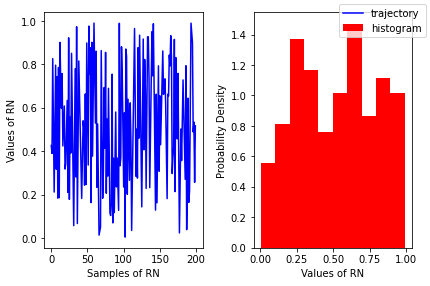

In [45]:
r = np.random.rand(200) 
rnplot(r)

In the same way we generate and visualize norally distributed random numbers, $N(0,1)$

$$P(x |\mu=0, \sigma=1) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

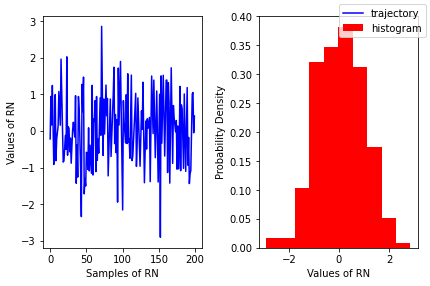

In [46]:
# For a standard normal with sigma=1, mu=0
r = np.random.randn(200)

# For a more general gaussian
rgauss = np.random.normal(loc=2., scale=5, size=200) 

rnplot(r)

- We showed examples of standard random numbers $U(0,1)$ and $N(0,1)$. There are many more ranom numbers sampled from general gaussian, poisson and binomial. Check [docs](https://numpy.org/doc/stable/reference/random/legacy.html#functions-in-numpy-random) for numpy.random for mor cases.

(2000,)


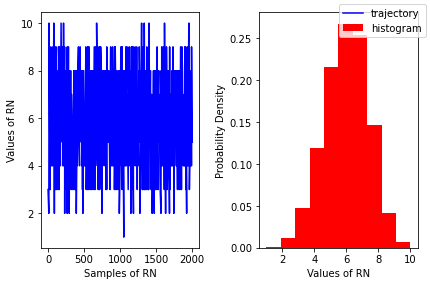

In [59]:
r = np.random.binomial(n=10, p=0.6, size=2000) 

print(r.shape)
rnplot(r)

### Using random numbers to get answers via simulations 

One of the major uses of random numbers is for conducting numerical simulations. What is a simulation? It is a recreation of a process on a computer. And this recreation is done by random numbers. E.g to simulate coint tosses, die throws, diffusion of molecules, conformational change of polymers we use random number to recreate the process on a computer. Let's start off by asking some simple questions

- How often do we get a run of 5 or more consecutive heads in 100 coin tosses if we repeat the experiment 1000 times?
<br>
- What if the coin is biased to generate heads only 40% of the time?

We will use ```np.random.choice``` which generates random samples from limited options. 

```python
np.random.choice(a, size, p, replace=True)
```
- ```a:``` an array/list of choices like, ```[-1, 1]``` or ```[1, 2, 3]``` or ```['bagel', 'muffin']```
- ```p:``` probabilities of picking choices from a. E.g ```p=[0.5, 0.5]```. Default is equal probabilities.
- ```size:``` shape of an array could be ```N, (N,M), (N,M,Q)``` etc
- ```replace=True.``` If you choose bagel from a, the caffee will put back a new one on shelf.

In [65]:
n = 100    # length of each trajectory
N = 1      # number of experiments: stochastic trajecotries generated

xs = np.random.choice([0,1], size=(n, N)) # (i) Unbiased coin p=[0.5,0.5] by default

ys = np.random.choice([0,1], size=(n, N), p=[0.9, 0.1])  # (ii) biased coin

plt.hist((xs[:,0], ys[:,0]), 2, label = ("unbiased", "biased"))
plt.legend()


### Simulating a 1D unbiased random walk 

- Random walker will be modeled by a random variable $X_i$ assuming +1 or -1 values at every ith step. 

- We will be tracking the net displacement of a random walker or cumulative sum of steps:

$$Z_n = \sum^{i=n}_{i=1} X_i$$

- We will be interested in computing probability distribution of $P(z=Z_n)$ and its various moments.
- We need $N$ number of independent random walkers making $n$ number of steps to get acurate statistics on $Z_n$ distribution! 

**Independent observations (trajectories) of random walkers**

In the course of simulating random walks we will be generating multidimensional numpy arrays. We will adhere to a convention that:

- **Rows** are regarded as number of measurements, or **samples**
- **Columns** are regarded as number of observables **distinct measurements/trajectories**

We then take **cumulative sum  over trajectory** which accumulates random walker's position over time [a, a+b, a+b+c,...]. This is done by convenient ```np.cumsum()``` method.

In [ ]:
def rw_1d(n, N):
    '''
    n: trajectory length
    N: Number of trajecotries
    returns np.array with shape (n, N) 
    '''
    
    # Create random walks 
    r  = choice([-1,1], size=(n, N))
    
    #Accumulate position
    rw = r.cumsum(axis=0)

    #Set initial position 
    rw[0,:]=0 
    
    return rw

In [68]:
rw = rw_1d(2000, 1000)

print(rw.shape)

(2000, 1000)


In [122]:
# Simulate 1D random walk
n_max = 1000
N     = 1000 
rw    = rw_1d(n_max, N)

@widgets.interact(t=(1, n_max-1))
def rw_plotter(t=1):
    
    fig, ax = plt.subplots(nrows=2)

    ax[0].plot(rw)
    ax[0].axvline(x=t, color='black', linestyle='-', lw=2)
    ax[1].hist(rw[t, :], color='orange', density=True, label=f'time={t}')

    ## Plot gaussian with width t**0.5
    x = np.linspace(-100,100, 1000)
    y = stats.norm.pdf(x, 0, np.sqrt(t))
    ax[1].plot(x,y, color='black', lw=2, label=f'std={np.sqrt(t):.2f}')  

    ax[0].set_ylabel('Position')
    ax[0].set_title('RW trajectries');

    ax[1].set_xlabel('Position')
    ax[1].set_ylabel('Histogram')
    ax[1].set_xlim([-100, 100])
    ax[1].legend()
    fig.tight_layout()

interactive(children=(IntSlider(value=1, description='t', max=999, min=1), Output()), _dom_classes=('widget-in…

### Fitting numerical random walk statistics to analytic probability distributions 

- So far we have mostly simulated random walk pretending that we do not know which porbability distributions the walk was governed.  

- Below we illustrate a few example uses of ```scipy.stats``` library which contains probability distribution functions.
- Moreover ```scipy.stats``` also has convenience reference to the same numpy random numbers that we have generated above. 

In [124]:
from scipy.stats import binom, norm, poisson  

s =  binom(n=10, p=0.5) # Let us declare s to be a binomial RV

print(s.rvs(20))          # 20 random samples form X
print(s.pmf(5))           # P(X = 5) pdf in case of continuous variable
print(s.cdf(5))           # P(X <= 5)
print(s.mean())           # E[X], mean
print(s.var())            # Var(X), variance
print(s.std())            # Std(X), standard deviation

In [214]:
def coin_flip(p,N):
    '''
    N: flip coint N times taking on values 0 or 1 
    p: with p probability
    ''' 
    # Binomial
    b       = binom(N, p) 
    
    #Gaussian       
    g = norm(N*p, (N*p*p)**0.5) #loc=mu, scale=sigma
    
    #Poisson
    p = poisson(N*p)
        
    fig, ax=plt.subplots(nrows=2, ncols=1)
    
    # Plot values of coin flips and histogram
    ax[0].plot(b.rvs(N), '-',color='grey')
    ax[1].hist(b.rvs(N),  density=True)
    
    # Possible values of a coin to plot dists
    vals    = np.arange(N) 
    
    ax[1].plot(b.pmf(vals), '-o', color='black', label='Binom')
    ax[1].plot(g.pdf(vals), color='green', label='Gauss')
    ax[1].plot(p.pmf(vals), color='red', label='Poisson')
    
    #ax[1].set_ylim(0,)
    ax[0].set_ylabel('Coin sum')
    ax[1].set_xlabel('Coin sum')
    ax[1].set_ylabel('Probability dist')
    ax[1].legend()
    fig.tight_layout()

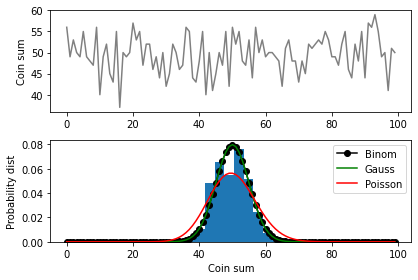

In [221]:
# try 0.1, 0.5 and 0.9
coin_flip(p=0.5, N=100);

### Problems



####  Confined diffusion.
Simulate 2D random walk in a circular confinement. Re-write 2D random walk  code to simulate diffusion of a particle which is stuck inside a sphere. 
Study how root mean square deviation of position scales with time. 
- Carry out simulations for different confinement sizes. 
- Make plots of simulated trajectories.

#### Return to the origin!

- Simulate random walk in 1D and 2D for a different number of steps $N=10, 10^2,10^3, 10^4, 10^5$
- Compute average number of returns to the origin $\langle n_{orig} \rangle$. That is number of times a random walker returns to the origin $0$ for 1D  or (0,0)$ for 2D . You may want to use some 1000 trajectories to obtain average. 
- Plot how $\langle n_{orig} \rangle$ depends on number of steps N for 1D and 2D walker.


####  Breaking the CLT; Cauchy vs Normal random walk in 2D

For this problem we are going to simulate two kinds of random walks in continuum space (not lattice): Levy flights and Normal distributd random walk. 

To simulate a 2D continuum space random walk we need to generate random step sizes $r_x$, $r_y$. 
Also you will need unifrom random namber to sample angles in 2D giving you a conitnuum random walk in 2D space: $x = r_x sin\theta$ and $y=r_ycos\theta$

- Normally: $r\sim N(0,1)$
- Cauchy distribution (long tails, infinite variance) $r\sim Cauchy(0,1)$
- Unform angles $\theta \sim U(0,1)$

Visualize random walk using matplotlib and study statistics of random walkers the way that is done for normal random walk/brownian motion examples!

#### (Optional Problem) Continuous time random walk (CTRW)

Simulate 1D random walk but instead of picking times at regular intervals pick them from  exponential distribution. <br>
Hint: you may want to use random variables from scipy.stats.exp <br>

[scipy.stats.expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) <br>

Study the root mean square deviation as a function of exponential decay parameter $\lambda$ of exponential distribution $e^{-\lambda x}$. 

## References

**The mighty little books**
-  ["Random Walks in Biology",  H Berg (1993)](https://www.amazon.com/Random-Walks-Biology-Howard-Berg/dp/0691000646)
-  ["Physical models of Living systems",  P Nelson (2015)](https://www.amazon.com/gp/product/1464140294/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1)

**More in depth**
 
 - ["Simple Brownian Diffusion: An Introduction to the Standard Theoretical Models", D Gillespie](https://www.amazon.com/Simple-Brownian-Diffusion-Introduction-Theoretical/dp/0199664501/ref=sr_1_1?keywords=diffusion+brownian&qid=1579882520&sr=8-1)
- 
 - ["Stochastic Processes for Physicists" K Jacobs](https://www.amazon.com/Stochastic-Processes-Physicists-Understanding-Systems/dp/0521765420/ref=sr_1_1?keywords=kurt+jacobs+stochastic&qid=1579882738&sr=8-1)
 
**On the applied side**
- [Brownian Motion: Elements of Colloid Dynamics A P Philipse (2018)](https://www.amazon.com/Brownian-Motion-Elements-Dynamics-Undergraduate/dp/3319980521/ref=sr_1_7?keywords=einstein+brownian&qid=1579882356&sr=8-7)